In [59]:
import pandas as pd
import matplotlib.pyplot as plt

andmed = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
andmed

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Ennustamine

In [60]:
# impordin vajalikud paketid
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [61]:
# eemaldan andmestikust customerID
uued_andmed = andmed.drop(['customerID','MonthlyCharges', 'TotalCharges'], axis=1)

# one-hot encodingu jaoks valitud veerud
kategooriatega_veerud = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                         'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# veergude muutmine
one_hot_andmed = pd.get_dummies(uued_andmed, columns=kategooriatega_veerud)

In [62]:
# jaotan andmestiku kaheks: "churn" väärtus ja kõik muu
x = one_hot_andmed.drop("Churn", axis = 1)
y = one_hot_andmed["Churn"]

# jagan andmestiku treening ja testimisrühmadeks
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [63]:
# random forest classifier
rf = RandomForestClassifier()

# mudeli fittimine treeningandmetel
rf.fit(X_train, y_train)

# ennustused
pred = rf.predict(X_test)

# täpsuse arvutamine
print("Täpsus:", accuracy_score(y_test, pred))

Täpsus: 0.7679205110007097


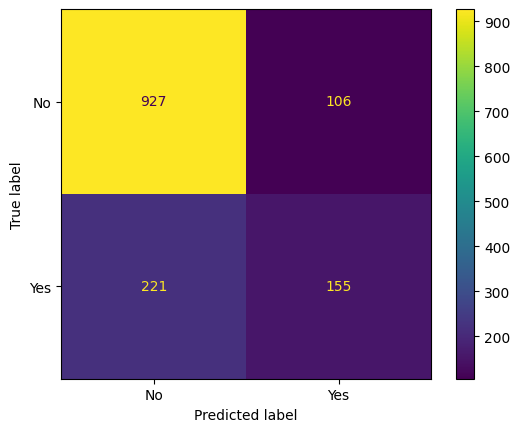

In [64]:
# teen confusion maatriksi
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)

# confusion maatriksi kujutamine
disp.plot()
plt.show()

# PaymentMethod - joonis

In [65]:
# arvutan loobunute seas PaymentMethod'it
loobunud = andmed[andmed["Churn"] == "Yes"] # andmestik, kus on ainult need kliendid, kes loobusid
maksmine_loobunud = loobunud['PaymentMethod'].value_counts().reset_index() # teen andmestikuks (dataframe)
maksmine_loobunud.columns = ["PaymentMethod", "Summa"] # vahetan veergude järjekorda ja nime
maksmine_loobunud["Allikas"] = "Loobunud" # lisan uue veeru, et oleks aru saada, kas tegu on loobunud või jätkanud grupiga

# arvutan mitte-loobunute seas PaymentMethod'it
jätkavad = andmed[andmed["Churn"] == "No"]
maksmine_jätk = jätkavad['PaymentMethod'].value_counts().reset_index()
maksmine_jätk.columns = ["PaymentMethod", "Summa"]
maksmine_jätk["Allikas"] = "Jätkanud"

# tekitad ühe andmestiku, kus on mõlemate PaymentMethod'id kokku pandud, et saaksin pärast seda visualiseerida
maksmise_meetod = pd.concat([maksmine_loobunud, maksmine_jätk])
maksmise_meetod

,PaymentMethod,Summa,Allikas
0,Electronic check,1071,Loobunud
1,Mailed check,308,Loobunud
2,Bank transfer (automatic),258,Loobunud
3,Credit card (automatic),232,Loobunud
0,Mailed check,1304,Jätkanud
1,Electronic check,1294,Jätkanud
2,Credit card (automatic),1290,Jätkanud
3,Bank transfer (automatic),1286,Jätkanud


<Figure size 1500x600 with 0 Axes>

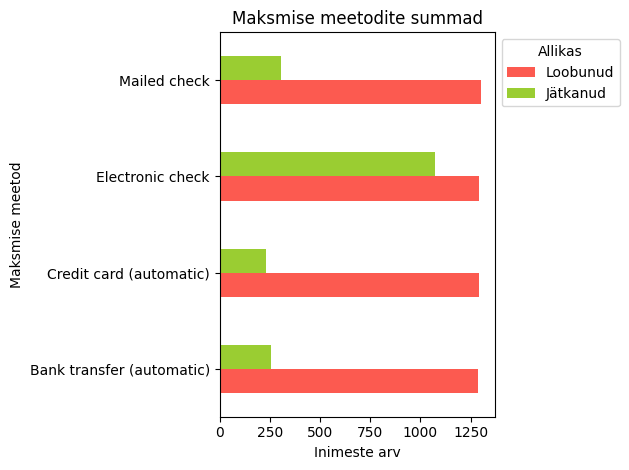

In [66]:
# visualiseerin saadud tulemused barplot'ina
df = maksmise_meetod

plt.figure(figsize = (15, 6))

# grupeerin "Allika" ja "PaymentMethod"-i
kokkupandud = maksmise_meetod.groupby(['Allikas', 'PaymentMethod']).sum().unstack('Allikas', fill_value=0)
kokkupandud.plot(kind='barh', color = ["#FC5A50", "#9ACD32"]) # barh'iga saan visualiseerida horisontaalselt, muutsin ka värve

# pealkirjad
plt.xlabel('Inimeste arv')
plt.ylabel('Maksmise meetod')
plt.title('Maksmise meetodite summad')

# joonise visualiseerimine
plt.legend(['Loobunud', 'Jätkanud'], title='Allikas', bbox_to_anchor=(1, 1), loc='upper left') # muudan allika nimesid
plt.tight_layout()
plt.show()

Saadud joonisel on näha, et enamik ettevõttest lahkunud kliente oli valinud maksmismeetodiks elektroonilise tšeki.

# InternetService - joonis

Järgmisena uuriks, kas on seost interneti teenuse puudumise, vanurite ning ettevõttest lahkumise vahel.

In [67]:
# teen uue andmestiku, kus on ainult vanurid sees
vanurite_andmestik = andmed[andmed["SeniorCitizen"] == 1]

# teen vanurite andmestikku väiksemaks ja jätan alles vaid need veerud, mida soovin
valitud_veerud = ["gender", "SeniorCitizen", "InternetService", "Churn"]
filtreeritud_seniors = vanurite_andmestik[valitud_veerud]

print(filtreeritud_seniors)

      gender  SeniorCitizen InternetService Churn
20      Male              1             DSL   Yes
30    Female              1     Fiber optic    No
31      Male              1     Fiber optic    No
34      Male              1             DSL    No
50    Female              1     Fiber optic    No
...      ...            ...             ...   ...
7023  Female              1     Fiber optic    No
7029  Female              1             DSL    No
7031    Male              1             DSL    No
7032    Male              1     Fiber optic   Yes
7041    Male              1     Fiber optic   Yes

[1142 rows x 4 columns]


In [68]:
# nüüd arvutan protsentuaalselt "gender", "InternetService" ja "Churn" grupid
protsendiga = filtreeritud_seniors.groupby(["InternetService", "Churn", "gender"]).size() / filtreeritud_seniors.groupby(["InternetService", "gender"]).size()

# protsendi veerul muudan nime, korrutan sajaga (et saada protsent) ning ümardan saadud tulemuse
protsendiga = protsendiga.reset_index(name = "Osakaalud")
protsendiga["Osakaalud"] = (protsendiga["Osakaalud"] * 100).round(2)

# muudan Churn veeru pealkirja ning sisu
protsendiga["Churn"] = protsendiga["Churn"].replace({"No": "Jätkanud", "Yes": "Loobunud"})
protsendiga.rename(columns = {"Churn": "Allikas"}, inplace = True)

print(protsendiga)

   InternetService  gender   Allikas  Osakaalud
0              DSL  Female  Jätkanud      69.11
1              DSL  Female  Loobunud      30.89
2              DSL    Male  Jätkanud      70.59
3              DSL    Male  Loobunud      29.41
4      Fiber optic  Female  Jätkanud      53.07
5      Fiber optic  Female  Loobunud      46.93
6      Fiber optic    Male  Jätkanud      52.33
7      Fiber optic    Male  Loobunud      47.67
8               No  Female  Jätkanud      85.71
9               No  Female  Loobunud      14.29
10              No    Male  Jätkanud      93.55
11              No    Male  Loobunud       6.45


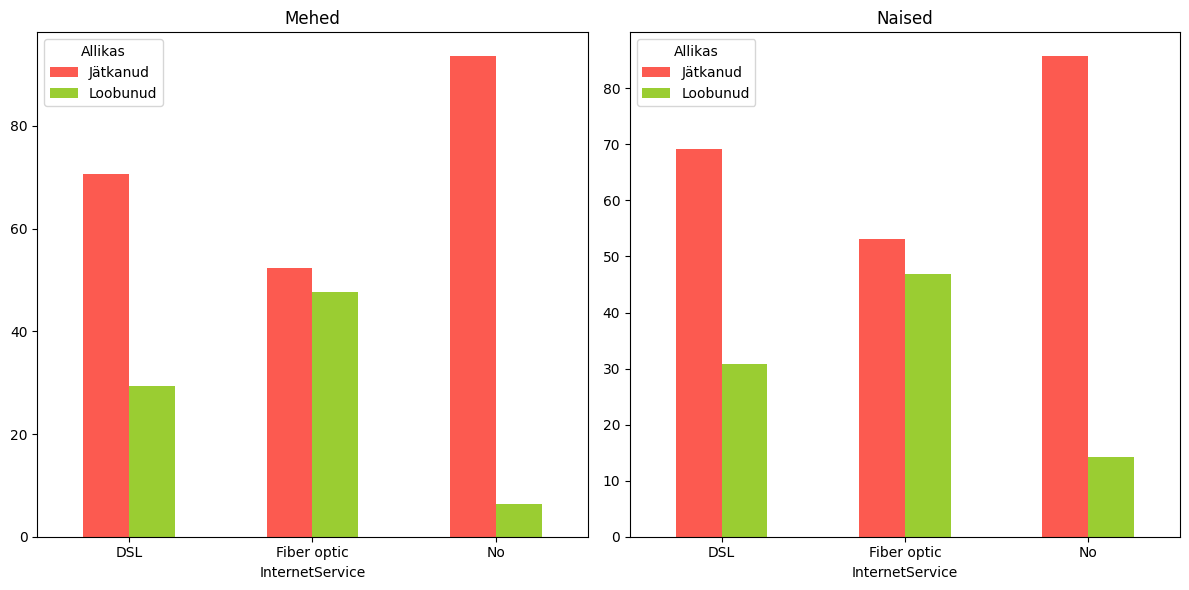

In [69]:
# teen kaks joonist, vasakule tuleb joonis meeste kohta, paremale joonis naiste kohta
fig, axs = plt.subplots(1, 2, figsize = (12, 6))

mehed = protsendiga[protsendiga["gender"] == "Male"] # teen andmestiku, kus on ainult mehed
mehed_grupeeritult = mehed.groupby(["InternetService", "Allikas"])["Osakaalud"].mean().unstack() # grupeerin InternetService ja Churni põhjal
mehed_grupeeritult.plot(kind = "bar", ax = axs[0], color = ["#FC5A50", "#9ACD32"]) # joonis
axs[0].set_title("Mehed") # määrasin mehed vasakule poole
axs[0].tick_params(axis = 'x', rotation = 0)  # panin teksti õiget pidi lugemiseks

naised = protsendiga[protsendiga["gender"] == "Female"]
naised_grupeeritult = naised.groupby(["InternetService", "Allikas"])["Osakaalud"].mean().unstack()
naised_grupeeritult.plot(kind = "bar", ax = axs[1], color = ["#FC5A50", "#9ACD32"])
axs[1].set_title("Naised")
axs[1].tick_params(axis = 'x', rotation = 0)

plt.tight_layout()
plt.show()

Kui vaadata saadud tulemusi, siis kõige suurem vahe on vanurite puhul "Ei" tulpades. Sooliselt erinevus näha pole.